# Lectura de nubes de puntos

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/robotica-autonoma-python/blob/main/5-Nubes-Puntos/5-1-Lectura-nube-puntos.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Nube de puntos en 2D

Las distancias medidas por un Lidar 2D se encuentran en el archivo "laser_data.txt". La primera medición se toma con un ángulo de -90° respecto del sistema de referencia del Lidar, y la última medición con un ángulo de 90°. En este caso, el campo visual del Lidar es únicamente 180°. Además, todos los otros valores se encuentran distribuidos de manera equidistante.

In [2]:
!wget -q https://raw.githubusercontent.com/oscar-ramos/robotica-autonoma-python/main/5-Nubes-Puntos/datos/laserdata2D.txt

In [4]:
# Lectura de los datos del Lidar
dist = np.loadtxt('laserdata2D.txt')

# Número de puntos en el escaneo
Npuntos = np.shape(dist)[0]

print("10 primeros valores del Lidar:", dist[:10])
print("Número de puntos de escaneo:", Npuntos)

10 primeros valores del Lidar: [1.1  1.1  1.11 1.11 1.12 1.14 1.12 1.12 1.12 1.12]
Número de puntos de escaneo: 361


In [5]:
# Obtención de valores angulares correspondientes a cada medición
angulo = np.linspace(-np.pi/2, np.pi/2, Npuntos)

print("10 primeros ángulos:", angulo[:10])

10 primeros ángulos: [-1.57079633 -1.56206968 -1.55334303 -1.54461639 -1.53588974 -1.5271631
 -1.51843645 -1.5097098  -1.50098316 -1.49225651]


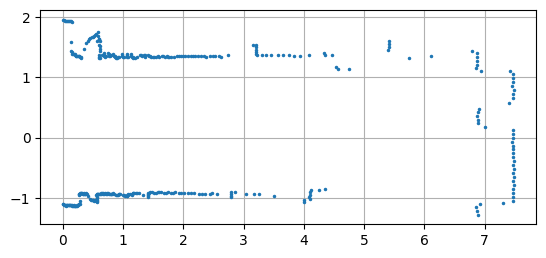

In [6]:
# Conversión de rango/ángulo a coordenadas cartesianas
x = dist * np.cos(angulo)
y = dist * np.sin(angulo)

plt.plot(x, y, '.', markersize=3)    # Puntos
plt.gca().set_aspect('equal')        # Igual escala en cada eje
plt.grid();

## 2. Nube de puntos en 3D

En este ejemplo se leerá un archivo de nube de puntos en formato PLY, por lo que se utilizará dos alernativas para su lectura: PlyFile y Open3D. Se puede también utilizar PCL, pero no corre en Google Colab debido a las dependencias que necesita.

In [7]:
# Obtención del archivo a utilizar
!wget -q https://raw.githubusercontent.com/oscar-ramos/robotica-autonoma-python/main/5-Nubes-Puntos/datos/frame200uav.ply

### 2.1. Lectura utilizando PlyFile

In [8]:
!pip install -q plyfile

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import plyfile

Los datos del Lidar en este caso se encuentran en formato PLY. Por este motivo se leerá la nube de puntos utilizando la librería "plyfile" que permite leer archivos de este tipo. Luego se recuperará las coordenadas X, Y, Z de cada uno de los puntos en un arreglo de numpy.

In [10]:
# Lectura del archivo PLY
plydata = plyfile.PlyData.read("frame200uav.ply")

# plydata

In [11]:
# Extracción de las coordenadas x, y, z
x = plydata['vertex']['x']
y = plydata['vertex']['y']
z = plydata['vertex']['z']

**Nube de puntos estática**

Se visualizará la nube de puntos con una figura 3D de cada uno de los puntos. Con este fin, se utilizará Matplotlib en Python.

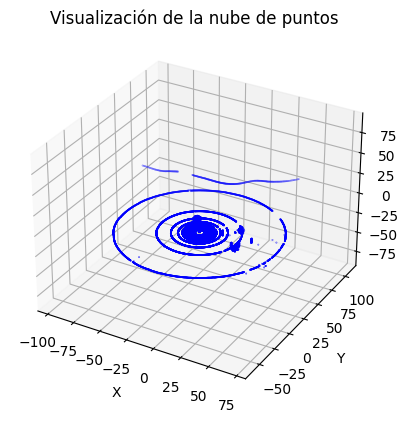

In [13]:
# Creación de una nueva figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Gráfica de la nube de puntos
ax.scatter(x, y, z, s=0.1, c='b', marker='o')

# Igualar escalas en cada eje
max_rango = 0.5*np.max([np.ptp(x), np.ptp(y), np.ptp(z)])
x0 = 0.5*(x.max()+x.min()); y0 = 0.5*(y.max()+y.min()); z0 = 0.5*(z.max()+z.min())
ax.set_xlim(x0-max_rango, x0+max_rango)
ax.set_ylim(y0-max_rango, y0+max_rango)
ax.set_zlim(z0-max_rango, z0+max_rango)

# Nombres de ejes y título
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.set_title('Visualización de la nube de puntos')
# Mostrar la imagen
plt.show();

**Nube de puntos dinámica**

Debido a que la figura estática no permite apreciar adecuadamente la nube de puntos, se realizará una gráfica dinámica usando "Plotly".

In [14]:
import plotly.graph_objs as go

In [15]:
# Creación de un gráfico de puntos 3D (scatter plot) de Plotly
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
                                   marker=dict(size=2, color='blue', opacity=0.6)
                                   )])

# Mitad del rango de los datos
rango = 0.5*np.max([np.ptp(x), np.ptp(y), np.ptp(z)])

# Igualar escalas en cada eje
fig.update_layout(scene=dict(
    xaxis=dict(range=[np.mean(x)-rango, np.mean(x)+rango], title='X'),
    yaxis=dict(range=[np.mean(y)-rango, np.mean(y)+rango], title='Y'),
    zaxis=dict(range=[np.mean(z)-rango, np.mean(z)+rango], title='Z'),
    aspectratio=dict(x=1, y=1, z=1),
    aspectmode='manual'
))

# Mostrar la figura
fig.show();

Output hidden; open in https://colab.research.google.com to view.

### 2.2. Lectura utilizando Open3D

Alternativamente se puede utilizar Open3D que es, en cierta forma, similar a PCL (PCL no corre en Google Colab). La ventaja de Open3D es que posee múltiples herramientas para procesar nubes de puntos.

In [16]:
!pip install -q open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.6 MB/s eta 0:00:00


In [17]:
import open3d as o3d

In [18]:
# Lectura de la nube de puntos
cloud = o3d.io.read_point_cloud("frame200uav.ply")

# La visualización nativa se realizaría así (pero no corre en colab)
# o3d.visualization.draw_geometries([cloud])

In [19]:
# Extracción de coordenadas
points = np.asarray(cloud.points)
x3d = points[:, 0]
y3d = points[:, 1]
z3d = points[:, 2]

In [20]:
# Creación de un gráfico de puntos 3D (scatter plot) de Plotly
fig = go.Figure(data=[go.Scatter3d(x=x3d, y=y3d, z=z3d, mode='markers',
                                   marker=dict(size=2, color='blue', opacity=0.6)
                                   )])

# Mitad del rango de los datos
rango = 0.5*np.max([np.ptp(x3d), np.ptp(y3d), np.ptp(z3d)])

# Igualar escalas en cada eje
fig.update_layout(scene=dict(
    xaxis=dict(range=[np.mean(x3d)-rango, np.mean(x3d)+rango], title='X'),
    yaxis=dict(range=[np.mean(y3d)-rango, np.mean(y3d)+rango], title='Y'),
    zaxis=dict(range=[np.mean(z3d)-rango, np.mean(z3d)+rango], title='Z'),
    aspectratio=dict(x=1, y=1, z=1),
    aspectmode='manual'
))

# Mostrar la figura
fig.show()